# ${\color{HotPink} \text{Task 1: Binary Representations}}$

### Task description

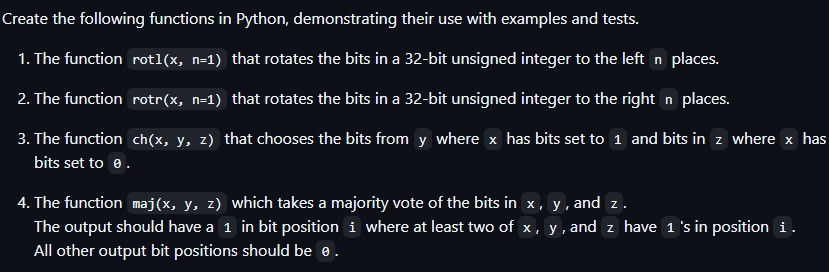

------

## ${\color{HotPink} \text{Notes for rotl()}}$

Material provided by lecturer on bitwise:  
https://github.com/ianmcloughlin/computational_theory/blob/main/materials/binary_representations.ipynb  
https://wiki.python.org/moin/BitwiseOperators 

CONCERNS:  
Should I handle wrap around bits?



In [1]:
# Task 1.1
def rotl(x, n):
    # Ensure that int x is 32 bits
    x = x & 0xFFFFFFFF

    # Ensure the bits don't move more than 32 bits
    n = n % 32
    
    # Move the int n positions, ensure it is 32 bits
    result = ((x << n)) & 0xFFFFFFFF

    # Print the result
    print("Results:")
    print("int: ", x, f"binary: {x:04b}")
    print("new int: ", result, f"new binary: {result:04b}")

    # Return
    return result

# Test
rotl(1, 2)

Results:
int:  1 binary: 0001
new int:  4 new binary: 0100


4

------

## ${\color{HotPink} \text{Notes for rotr()}}$

Rotl is the same as rotr but the bitwise opperator changes direction


In [2]:
# Task 1.2
def rotr(x, n):
    # Ensure that int x is 32 bits
    x = x & 0xFFFFFFFF

    # Ensure the bits don't move more than 32 bits
    n = n % 32
    
    # Move the int n positions, ensure it is 32 bits
    result = ((x >> n)) & 0xFFFFFFFF

    # Print the result
    print("Results:")
    print("int: ", x, f"binary: {x:04b}")
    print("new int: ", result, f"new binary: {result:04b}")

    # Return
    return result

# Tests
rotr(4, 1)

Results:
int:  4 binary: 0100
new int:  2 new binary: 0010


2

------

## ${\color{HotPink} \text{Notes for ch()}}$

As showcased in tests two & three the result may vary based on the lengths of binary inputs.  
I am not going to ensure the length of the result is the length of x.

In [3]:
# Task 1.3
def ch(x, y, z):
    
    # ~ = compliment or not (like ! operator but for a bit)
    # If x = 1 the output is taken from y.
    # If x = 0 the output is taken from z.
    result = (x & y) | (~x & z)

    return result

# Tests
test1 = ch(0b1010, 0b1100, 0b1110)
test2 = ch(0b0011101011110, 0b1110110010, 0b011101001101)
test3 = ch(0b0010101, 0b1110110010, 0b011101001101)

print(f"{test1:0b}")
print(f"{test2:0b}")
print(f"{test3:0b}")

1100
1100010011
11101011000


------

## ${\color{HotPink} \text{Notes for maj()}}$

maj stands for majority.
This function returns a new binary value based on the binary values passed in


In [4]:
# Task 1.4
def maj(x, y, z):

    # If at least 2 bits are 1 the output is 1 
    result = (x & y) | (x & z) | (y & z)

    return result

# Tests
test1 = maj(0b1000101, 0b1001001, 0b0011101)

print(f"{test1:0b}")

1001101


------

# ${\color{LightPink} \text{Task 2: Hash Functions}}$

### Task description

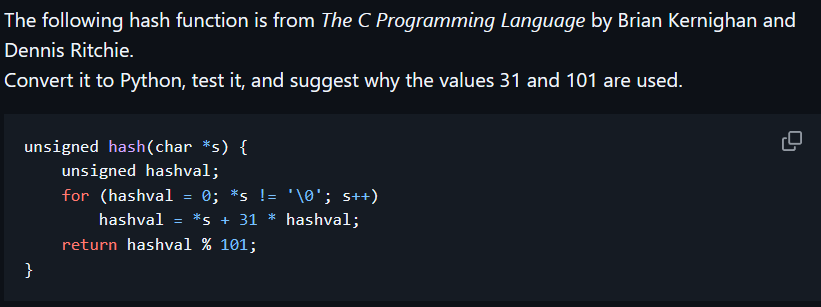

------

## ${\color{HotPink} \text{Notes for hash()}}$

${\color{HotPink} \text{The C Programming language book:}}$  
This is an unofficial link to a pdf copy of the book from google scholar.  
http://117.250.119.200:8080/jspui/bitstream/123456789/1373/1/%5BKernighan-Ritchie%5DThe_C_Programming_Language.pdf  

>${\color{HotPink} \text{Changes in the behaviour due to implementation}}$

${\color{HotPink} \text{Unsigned values}}$  
"An unsigned is an integer that can never be negative."  
https://soundsoftware.ac.uk/c-pitfall-unsigned.html#:~:text=C%20and%20C%2B%2B%20are%20unusual,that%20can%20never%20be%20negative.  

To replicate the way C's unsigned int functionality I forced the hashval to 32-bit unsigned mask in using "& 0xFFFFFFFF", this comes with the limitation of only storing numbers in the range of 0 to 4,294,967,295.

${\color{HotPink} \text{Ord}}$  
https://www.w3schools.com/python/ref_func_ord.asp  
This returns unicode representing the char, unlike the c implementation this supports special characters. 

>${\color{HotPink} \text{Signifigance of using 31 and 101}}$  

31: 
- It being a prime number it helped reduce collisions when used as a multiplier. A collision occurs when two different inputs produce the same hash values.  

- It is small enough to avoid overflow issues but large enough to spread out hash values. This was very helpful with the memory constraints in the C implementation. It is less necessary in the python implementation.  

101:
- By using value %(mod) 101, the return value fits between 0 - 100 inclusive, which helps with the storage constraints in C.
- Also it being a prime number helps avoid collisions.

${\color{HotPink} \text{Summary}}$  
- The hash method maintains the unsigned int behaviour seen in C by not allowing negative numbers, but it limits storage to 32 bits as a trade-off.  
- The ord method changes this implementation to include support for more characters, however this version behaves differently as a result.

In [ ]:
def hash(s):
    hashval = 0
    for c in s:
        hashval = ord(c) + 31 * hashval & 0xFFFFFFFF
    return hashval % 101

test_string = "hash in python"
hash(test_string)

50

------